# Over expression and down regulation targets for lycopene production (MEP pathway)

We want to know which reactions, if over expressed or down regulated, affect lycopene production. This will require going through all the reactions to see whether they affect lycopene production or are affected by it. Using flux scanning based enforced objective flux (FSEOF) it is possible to see which fluxes increase or decrease as the product flux increases. This method has been validated for lycopene production in $\textit{E. coli}$ as FSEOF accuretly predicted increased lycopene production when certain genes were over expressed  (Choi et al.). We start with importing a FSEOF algorithm from the cameo package and importing our yeast model with the heterologous pathway.

In [1]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cobra.io import read_sbml_model

model = read_sbml_model('MEP_only.xml')
medium=model.medium

In [2]:
fseof = FSEOF(model)

Here we use the FSEOF algorithm to identify the reactions affected by varied lycopene flux 

In [3]:
sol=fseof.run(target=model.reactions.get_by_id("CrtI"))
df=sol.data_frame;

In [4]:
df

,1,2,3,4,5,6,7,8,9,10
r_0024,0.000000,0.000000,0.000000,5.768294,5.204453,4.640611,4.076770,3.413156,2.686267,1.490652
r_0077,39.298108,81.395578,123.520373,165.718506,207.926299,250.134092,292.341885,334.588383,376.859428,419.312309
r_0091,184.577003,295.228859,381.052329,475.081835,568.953154,662.824473,756.695793,851.903518,933.192816,1000.000000
r_0112,28.641441,27.487547,26.042821,33.335986,30.077447,26.818909,23.560370,34.753417,27.352096,15.178105
r_0113,0.000163,0.000156,0.000148,0.000136,0.000122,0.000109,0.000096,0.000080,0.000063,0.000035
...,...,...,...,...,...,...,...,...,...,...
ispE,46.497100,88.304540,130.066205,171.705011,213.327633,254.950255,296.572877,338.130657,379.647315,420.859351
ispF,46.497100,88.304540,130.066205,171.705011,213.327633,254.950255,296.572877,338.130657,379.647315,420.859351
ispG,46.497100,88.304540,130.066205,171.705011,213.327633,254.950255,296.572877,338.130657,379.647315,420.859351
ispH2,46.497100,88.304540,130.066205,171.705011,213.327633,254.950255,296.572877,338.130657,379.647315,420.859351


In [5]:
model.reactions.get_by_id('r_0024')

Reaction identifier,r_0024
Name,2-isopropylmalate synthase
Memory address,0x07f683ba10820
Stoichiometry,h2o_c + s_0232[c] + s_0373[c] --> h_c + s_0162[c] + s_0529[c] H2O [cytoplasm] + 3-methyl-2-oxobutanoate [cytoplasm] + acetyl-CoA [cytoplasm] --> H+ [cytoplasm] + 2-isopropylmalate [cytoplasm] + coenzyme A [cytoplasm]
GPR,YNL104C or YOR108W
Lower bound,0.0
Upper bound,1000.0


There are 110 reaction fluxes affected as visualized below. Many of these are not valuable targets for gene manipulation and in the following sections we will try to extract the most obvious candidates.

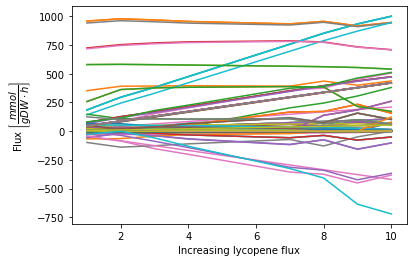

In [6]:
from matplotlib import pyplot as plt

plt.plot(df.T);
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

# Down regulation targets

To find downregulation targets we want to look at reactions that decrease in flux as lycopene flux increases. So we weed out those values. We also want a significant change in flux, a significant flux overall and ignore values that have no flux to start with. Since there are many reactions it is prudent for this analysis to exclude a lot of the less significant ones. This is done to find the most impactful reactions because when designing a cell factory it is not easy to make a lot of changes.

In [7]:
Keys = []
for row in range(len(df[1])):
        if df[1][row]==0.0:
            continue
        elif df[1][row]>df[10][row] and abs(df[1][row]-df[10][row])/abs(df[1][row])>0.5 and df[1][row]-df[10][row]>0.1:
            Keys.append(df.index[row])
Reactions=df.T[Keys].T.sort_values(by=[10])
Reactions

,1,2,3,4,5,6,7,8,9,10
r_4460,-28.794448,0.000000,-59.245593,-131.636970,-196.175263,-260.713555,-325.251847,-407.845465,-635.545924,-720.240197
r_1842,-42.156780,-84.139081,-126.119680,-168.095707,-210.071133,-252.046558,-294.021984,-335.994997,-377.966480,-419.926629
r_0714,-50.790757,-85.460398,-152.457607,-201.655408,-253.038653,-304.421897,-355.805142,-375.125498,-450.774563,-382.058236
r_1795,-56.971685,-19.131336,-40.395286,-69.076470,-85.150244,-101.224019,-117.297793,-75.827483,-157.566416,-102.648863
r_0446,-53.776413,-16.064793,-37.489919,-66.419360,-82.752862,-99.086365,-115.419867,-74.255245,-156.329013,-101.962209
r_1965,-26.325100,-7.491976,-18.232943,-32.741414,-40.953938,-49.166461,-57.378985,-36.850545,-77.946437,-50.860094
r_2045,-26.321229,-7.488261,-18.229424,-32.738195,-40.951033,-49.163872,-57.376710,-36.848640,-77.944938,-50.859263
r_0503,-26.321229,-7.488261,-18.229424,-32.738195,-40.951033,-49.163872,-57.376710,-36.848640,-77.944938,-50.859263
r_0815,-0.158354,-0.151974,-0.143986,-0.131683,-0.118811,-0.105940,-0.093068,-0.077918,-1.746436,-0.969125
r_1265,23.180007,7.370613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


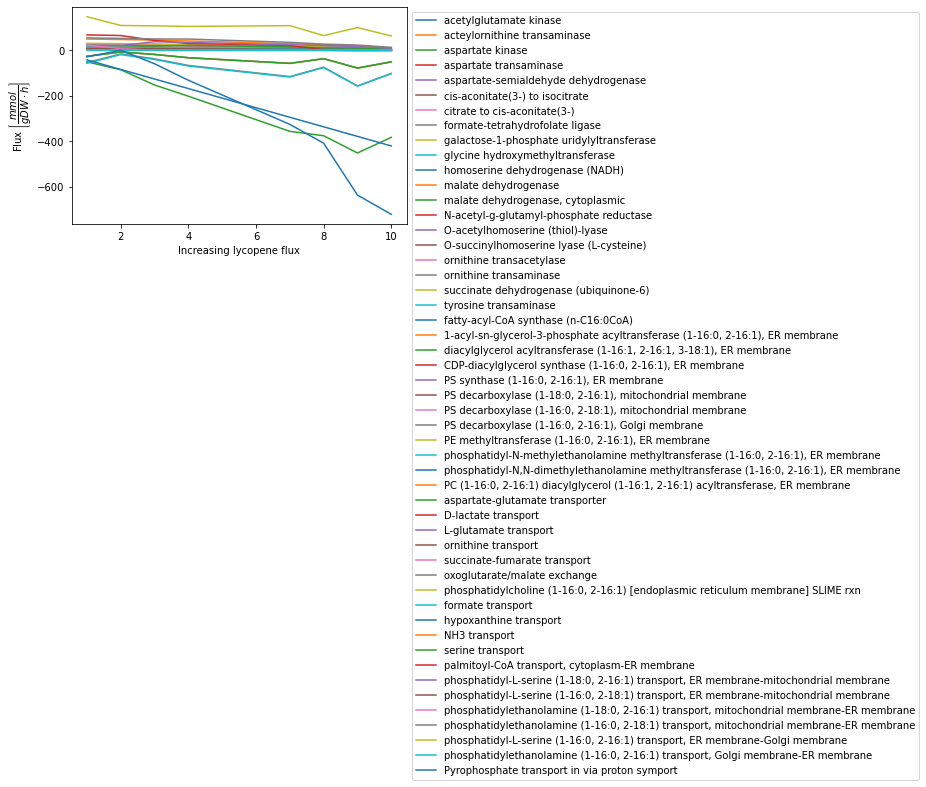

In [8]:
for k in Keys:
    plt.plot(Reactions.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

In [9]:
for id in Reactions.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

Pyrophosphate transport in via proton symport r_4460, final flux: -720.240197
H+ [extracellular] + diphosphate [extracellular] ==> diphosphate [cytoplasm] + H+ [cytoplasm]

hypoxanthine transport r_1842, final flux: -419.926629
hypoxanthine [extracellular] ==> hypoxanthine [cytoplasm]

malate dehydrogenase, cytoplasmic r_0714, final flux: -382.058236
(S)-malate [cytoplasm] + NAD [cytoplasm] ==> H+ [cytoplasm] + NADH [cytoplasm] + oxaloacetate [cytoplasm]

formate transport r_1795, final flux: -102.648863
formate [extracellular] ==> formate [cytoplasm]

formate-tetrahydrofolate ligase r_0446, final flux: -101.962209
ATP [cytoplasm] + formate [cytoplasm] + THF [cytoplasm] ==> 10-formyl-THF [cytoplasm] + ADP [cytoplasm] + phosphate [cytoplasm]

NH3 transport r_1965, final flux: -50.860094
ammonium [cytoplasm] ==> ammonium [mitochondrion]

serine transport r_2045, final flux: -50.859263
L-serine [cytoplasm] ==> L-serine [mitochondrion]

glycine hydroxymethyltransferase r_0503, final flux: 

# General targets

Now we want to see which fluxes change signifigantly along with being signifigant in value. These fluxes could be good candidates for gene manipulation. We choose an increase of over 80% and a final flux above 0.3 mmol/gDW h

In [10]:
Keys = []
for row in range(len(df[1])):
    if df[1][row]!=0:
        if abs(df[1][row]-df[10][row])/abs(df[1][row])>0.8 and abs(df[10][row])>0.3:
            Keys.append(df.index[row])

In [11]:
Reactions=df.T[Keys].T.sort_values(by=[10])

In [12]:
Keys=Reactions.index
Reactions

,1,2,3,4,5,6,7,8,9,10
r_4460,-28.794448,0.000000,-59.245593,-131.636970,-196.175263,-260.713555,-325.251847,-407.845465,-635.545924,-720.240197
r_1842,-42.156780,-84.139081,-126.119680,-168.095707,-210.071133,-252.046558,-294.021984,-335.994997,-377.966480,-419.926629
r_0714,-50.790757,-85.460398,-152.457607,-201.655408,-253.038653,-304.421897,-355.805142,-375.125498,-450.774563,-382.058236
r_1795,-56.971685,-19.131336,-40.395286,-69.076470,-85.150244,-101.224019,-117.297793,-75.827483,-157.566416,-102.648863
r_0446,-53.776413,-16.064793,-37.489919,-66.419360,-82.752862,-99.086365,-115.419867,-74.255245,-156.329013,-101.962209
r_1965,-26.325100,-7.491976,-18.232943,-32.741414,-40.953938,-49.166461,-57.378985,-36.850545,-77.946437,-50.860094
r_2045,-26.321229,-7.488261,-18.229424,-32.738195,-40.951033,-49.163872,-57.376710,-36.848640,-77.944938,-50.859263
r_0503,-26.321229,-7.488261,-18.229424,-32.738195,-40.951033,-49.163872,-57.376710,-36.848640,-77.944938,-50.859263
r_1138,-67.520431,-64.800198,-43.195620,-29.986190,-27.055088,-24.123986,-21.192885,-2.714926,-2.136737,-1.185709
r_0815,-0.158354,-0.151974,-0.143986,-0.131683,-0.118811,-0.105940,-0.093068,-0.077918,-1.746436,-0.969125


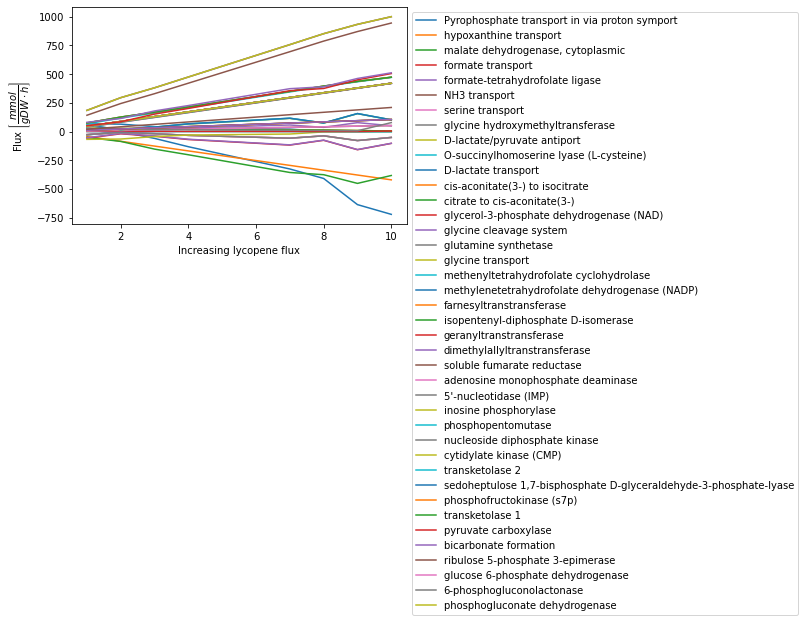

In [13]:
for k in Keys:
    plt.plot(Reactions.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

These criteria yield a more workable list of reactions.

In [14]:
for id in Reactions.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

Pyrophosphate transport in via proton symport r_4460, final flux: -720.240197
H+ [extracellular] + diphosphate [extracellular] ==> diphosphate [cytoplasm] + H+ [cytoplasm]

hypoxanthine transport r_1842, final flux: -419.926629
hypoxanthine [extracellular] ==> hypoxanthine [cytoplasm]

malate dehydrogenase, cytoplasmic r_0714, final flux: -382.058236
(S)-malate [cytoplasm] + NAD [cytoplasm] ==> H+ [cytoplasm] + NADH [cytoplasm] + oxaloacetate [cytoplasm]

formate transport r_1795, final flux: -102.648863
formate [extracellular] ==> formate [cytoplasm]

formate-tetrahydrofolate ligase r_0446, final flux: -101.962209
ATP [cytoplasm] + formate [cytoplasm] + THF [cytoplasm] ==> 10-formyl-THF [cytoplasm] + ADP [cytoplasm] + phosphate [cytoplasm]

NH3 transport r_1965, final flux: -50.860094
ammonium [cytoplasm] ==> ammonium [mitochondrion]

serine transport r_2045, final flux: -50.859263
L-serine [cytoplasm] ==> L-serine [mitochondrion]

glycine hydroxymethyltransferase r_0503, final flux: 

# References 

1 H. S. Choi, S. Y. Lee, T. Y. Kim, and H. M. Woo, ‘In silico identification of gene amplification targets'